In [1]:
import textacy
import pandas as pd
from textacy.extract import keyterms as kt

In [2]:
from load_data import get_df
df = get_df()
df.reset_index(inplace=True)

In [3]:
terms = []
en = textacy.load_spacy_lang("en_core_web_sm", disable=("parser",))
for index in range(len(df)):
    doc = textacy.make_spacy_doc(df['Headline'][index], lang=en)
    output = kt.textrank(
        doc,
        normalize="lemma",
        window_size=10,
        edge_weighting="count",
        position_bias=True,
        topn=5,
    )
    for i in range(len(output)):
        terms.append(output[i][0])

In [4]:
len(terms)

2892

In [5]:
terms[:20]

['global economic environment',
 'fiscal crisis',
 'legacy',
 'Queen',
 'suffering',
 'ancestor',
 'Temple idol',
 'Jhenidah',
 'Chhatra Odhikar',
 'BCL man',
 'activist',
 'attack',
 'jail',
 'Shanghai Cooperation Organization Summit',
 'new context',
 'new direction',
 'Hoolock',
 'Ctg',
 'Gopalganj road crash',
 'unusual gift']

In [6]:
corpus = terms

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
cv = CountVectorizer(
    max_df=0.8,
    max_features=1000,
    ngram_range=(1,3)
)

In [9]:
X = cv.fit_transform(corpus)

In [10]:
list(cv.vocabulary_.keys())[:10]

['global',
 'economic',
 'environment',
 'global economic',
 'crisis',
 'queen',
 'chhatra',
 'odhikar',
 'chhatra odhikar',
 'bcl']

[Text(0, 0, 'bangladesh'),
 Text(1, 0, 'man'),
 Text(2, 0, 'world'),
 Text(3, 0, 'dhaka'),
 Text(4, 0, 'death'),
 Text(5, 0, 'new'),
 Text(6, 0, 'india'),
 Text(7, 0, 'day'),
 Text(8, 0, 'bank'),
 Text(9, 0, 'iran'),
 Text(10, 0, 'woman'),
 Text(11, 0, 'covid'),
 Text(12, 0, 'pm'),
 Text(13, 0, 'power'),
 Text(14, 0, 'ukraine'),
 Text(15, 0, 'cup'),
 Text(16, 0, 'ctg'),
 Text(17, 0, 'bus'),
 Text(18, 0, 'country'),
 Text(19, 0, 'govt')]

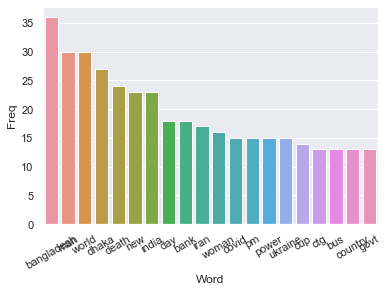

In [11]:
# Most frequently occuring words
import seaborn as sns


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)

    sum_words = bag_of_words.sum(axis=0)

    words_freq = [
        (word, sum_words[0, idx]) for word, idx in
        vec.vocabulary_.items()
    ]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns = ["Word", "Freq"]

#Barplot of most freq words
sns.set(rc={'figure.figsize': (13, 8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

            Bi-gram  Freq
0         world cup    13
1     mental health     7
2          covid 19     6
3   positivity rate     6
4         sri lanka     6
5         t20 world     6
6   chhatra odhikar     5
7            t20 wc     5
8     social medium     4
9       new zealand     4
10         19 death     4
11      mahsa amini     4
12      nobel prize     4
13      murder case     4
14      kabir suman     4
15          bcl man     3
16       road crash     3
17       death toll     3
18          la liga     3
19        al leader     3


[Text(0, 0, 'world cup'),
 Text(1, 0, 'mental health'),
 Text(2, 0, 'covid 19'),
 Text(3, 0, 'positivity rate'),
 Text(4, 0, 'sri lanka'),
 Text(5, 0, 't20 world'),
 Text(6, 0, 'chhatra odhikar'),
 Text(7, 0, 't20 wc'),
 Text(8, 0, 'social medium'),
 Text(9, 0, 'new zealand'),
 Text(10, 0, '19 death'),
 Text(11, 0, 'mahsa amini'),
 Text(12, 0, 'nobel prize'),
 Text(13, 0, 'murder case'),
 Text(14, 0, 'kabir suman'),
 Text(15, 0, 'bcl man'),
 Text(16, 0, 'road crash'),
 Text(17, 0, 'death toll'),
 Text(18, 0, 'la liga'),
 Text(19, 0, 'al leader')]

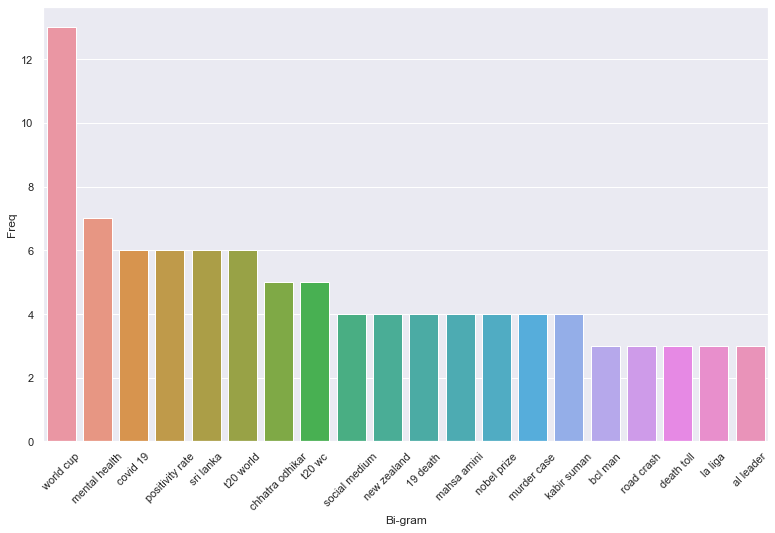

In [12]:
#Most frequently occuring Bi-grams

def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2, 2),
                           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize': (13, 8)})
h = sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)


                             Tri-gram  Freq
0                       t20 world cup     6
1                      covid 19 death     4
2          bangladesh wedding couture     2
3                wedding couture week     2
4                 dengue grip rooppur     2
5                  grip rooppur plant     2
6                    world cup opener     2
7                natore al infighting     2
8               ghorashal power plant     2
9                 world mental health     2
10                  mental health day     2
11               lawmaker sheikh anne     2
12                   dui diner duniya     2
13           chhatra odhikar activist     2
14                       t20 wc squad     2
15                        uk pm truss     2
16               ctg eastern refinery     2
17        global economic environment     1
18  shanghai cooperation organization     1
19    cooperation organization summit     1


[Text(0, 0, 't20 world cup'),
 Text(1, 0, 'covid 19 death'),
 Text(2, 0, 'bangladesh wedding couture'),
 Text(3, 0, 'wedding couture week'),
 Text(4, 0, 'dengue grip rooppur'),
 Text(5, 0, 'grip rooppur plant'),
 Text(6, 0, 'world cup opener'),
 Text(7, 0, 'natore al infighting'),
 Text(8, 0, 'ghorashal power plant'),
 Text(9, 0, 'world mental health'),
 Text(10, 0, 'mental health day'),
 Text(11, 0, 'lawmaker sheikh anne'),
 Text(12, 0, 'dui diner duniya'),
 Text(13, 0, 'chhatra odhikar activist'),
 Text(14, 0, 't20 wc squad'),
 Text(15, 0, 'uk pm truss'),
 Text(16, 0, 'ctg eastern refinery'),
 Text(17, 0, 'global economic environment'),
 Text(18, 0, 'shanghai cooperation organization'),
 Text(19, 0, 'cooperation organization summit')]

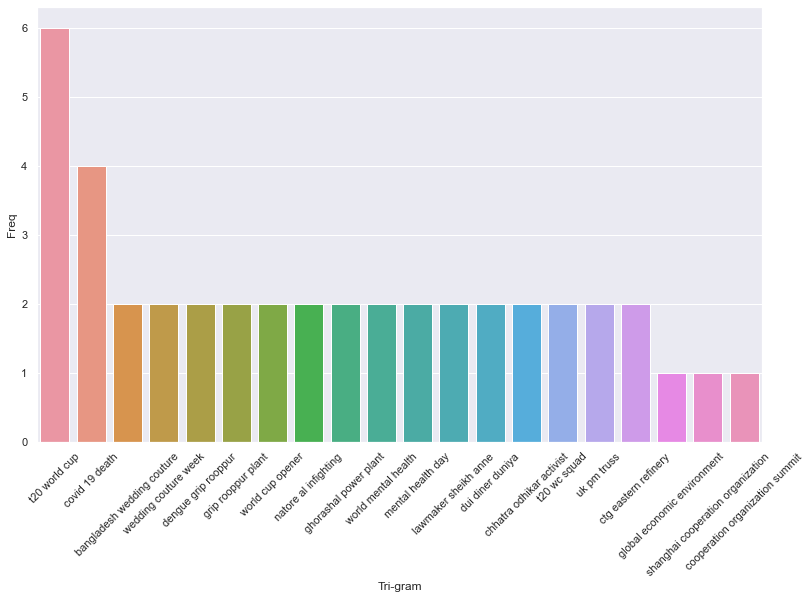

In [13]:
#Most frequently occuring Tri-grams

def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3, 3),
                           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
sns.set(rc={'figure.figsize': (13, 8)})
j = sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)
